In [52]:
edges = [
    (1, 1, 'a'),
    (1, 1, 'b'),
    (1, 2, 'a'),
    (2, 3, 'b'),
    (3, 4, 'a'),
    (4, 5, 'b'),
    (5, 5, 'a'),
    (5, 5, 'b'),
    (5, 6, 'a'),
    (6, 7, 'b'),
    (7, 8, 'a'),
    (8, 9, 'b'),
    (9, 9, 'a'),
    (9, 9, 'b'),
]

In [53]:
finish = {9,}

In [54]:

stack = [{1,}]
visited = set()
h = lambda x: tuple(sorted(list(x)))

def toStr(st):
    if len(st) == 0:
        return "Ø"
    else:
        return "\"" + str(st) + "\""

with open("./graph2.txt", "w") as fout:
    fout.write("digraph {\n" +\
                "rankdir=LR\n" +\
                "rankType=sink\n" +\
                "node " +\
                "[shape=none margin=0 fontcolor=black fontsize=14 width=0.5]\n")

    for a in stack:
        fout.write("start -> " + toStr(set(a)) + ";\n")    
        fout.write("start [shape=none fontcolor=white];\n")  
        
    while len(stack) > 0:
        c = stack.pop()
        if h(c) in visited:
            continue
        
        visited.add(h(c))
        
        next_a = set([j for (i, j, v) in edges if i in c and v == 'a'])
        next_b = set([j for (i, j, v) in edges if i in c and v == 'b'])

        stack.append(next_b)
        stack.append(next_a)
    
        if (next_a == next_b):
            fout.write(toStr(c) + " -> " + toStr(next_a) + " [label=\"a,b\"];\n")    
            continue

        fout.write(toStr(c) + " -> " + toStr(next_a) + " [label=a];\n")        
        fout.write(toStr(c) + " -> " + toStr(next_b) + " [label=b];\n")

    i = 0
    for a in visited:
        if len(finish & set(a)):
            fout.write(toStr(set(a)) + " -> exit" + str(i) + ";\n")        
            fout.write("exit" + str(i) + " [shape=none fontcolor=white];\n")        
            i += 1

    fout.write("}\n")

    

In [67]:
import subprocess
subprocess.run(["dot", "-Tsvg", "./graph2.txt", "-o", "./graph.svg"])

CompletedProcess(args=['dot', '-Tsvg', './graph2.txt', '-o', './graph.svg'], returncode=0)

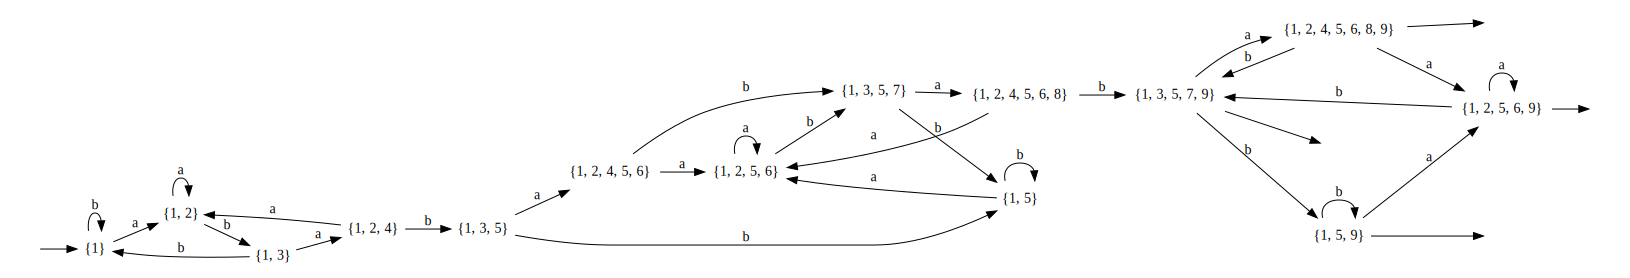

In [68]:
from IPython.display import SVG, display
display(SVG(filename="./graph.svg"))